In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import tensorflow as tf
import cv2, os, gc, glob
from tqdm import tqdm
from keras.preprocessing import image
from tensorflow.keras import layers, models

import keras
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from keras.utils import np_utils

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

Using TensorFlow backend.


In [2]:
image_directory= 'C:\\Users\\Akshata\\Desktop\\project\\Rice Leaf Disease Images\\Train\\'
diseased=os.listdir(image_directory+'diseased/')
control=os.listdir(image_directory+'control/')


In [3]:
print(len(diseased))
print(len(control))

258
343


In [4]:
print(diseased)

['0.jpg', '1.jpg', '10.jpg', '100.jpg', '101.jpg', '102.jpg', '103.jpg', '104.jpg', '105.jpg', '106.jpg', '107.jpg', '108.jpg', '109.jpg', '11.jpg', '110.jpg', '111.jpg', '112.jpg', '113.jpg', '114.jpg', '115.jpg', '116.jpg', '117.jpg', '118.jpg', '119.jpg', '12.jpg', '120.jpg', '121.jpg', '122.jpg', '123.jpg', '124.jpg', '125.jpg', '126.jpg', '127.jpg', '128.jpg', '129.jpg', '13.jpg', '130.jpg', '131.jpg', '132.jpg', '133.jpg', '134.jpg', '135.jpg', '136.jpg', '137.jpg', '138.jpg', '139.jpg', '14.jpg', '140.jpg', '141.jpg', '142.jpg', '143.jpg', '144.jpg', '145.jpg', '146.jpg', '147.jpg', '148.jpg', '149.jpg', '15.jpg', '150.jpg', '151.jpg', '152.jpg', '153.jpg', '154.jpg', '155.jpg', '156.jpg', '157.jpg', '158.jpg', '159.jpg', '16.jpg', '160.jpg', '161.jpg', '162.jpg', '163.jpg', '164.jpg', '165.jpg', '166.jpg', '167.jpg', '168.jpg', '169.jpg', '17.jpg', '170.jpg', '171.jpg', '172.jpg', '173.jpg', '174.jpg', '175.jpg', '176.jpg', '177.jpg', '178.jpg', '179.jpg', '18.jpg', '180.jpg', 

In [5]:
print(control)

['0.jpg', '1.jpg', '10.jpg', '100.jpg', '101.jpg', '102.jpg', '103.jpg', '104.jpg', '105.jpg', '106.jpg', '107.jpg', '108.jpg', '109.jpg', '11.jpg', '110.jpg', '111.jpg', '112.jpg', '113.jpg', '114.jpg', '115.jpg', '117.jpg', '118.jpg', '119.jpg', '12.jpg', '120.jpg', '121.jpg', '122.jpg', '123.jpg', '124.jpg', '125.jpg', '126.jpg', '127.jpg', '128.jpg', '129.jpg', '13.jpg', '130.jpg', '131.jpg', '132.jpg', '133.jpg', '134.jpg', '135.jpg', '136.jpg', '137.jpg', '138.jpg', '139.jpg', '140.jpg', '141.jpg', '142.jpg', '143.jpg', '144.jpg', '145.jpg', '146.jpg', '147.jpg', '148.jpg', '149.jpg', '15.jpg', '150.jpg', '151.jpg', '152.jpg', '153.jpg', '154.jpg', '155.jpg', '156.jpg', '157.jpg', '158.jpg', '159.jpg', '16.jpg', '160.jpg', '161.jpg', '162.jpg', '163.jpg', '164.jpg', '165.jpg', '166.jpg', '167.jpg', '168.jpg', '169.jpg', '17.jpg', '170.jpg', '171.jpg', '172.jpg', '173.jpg', '174.jpg', '175.jpg', '176.jpg', '177.jpg', '178.jpg', '179.jpg', '18.jpg', '181.jpg', '183.jpg', '184.jpg',

In [6]:
image_directory= 'C:\\Users\\Akshata\\Desktop\\project\\Rice Leaf Disease Images\\Train\\diseased\\*.jpg'
glob.glob(image_directory)
images=[cv2.cvtColor(cv2.imread(image_directory),cv2.COLOR_BGR2RGB) for image_directory in glob.glob(image_directory)]

In [7]:
type(images)
len(images)

258

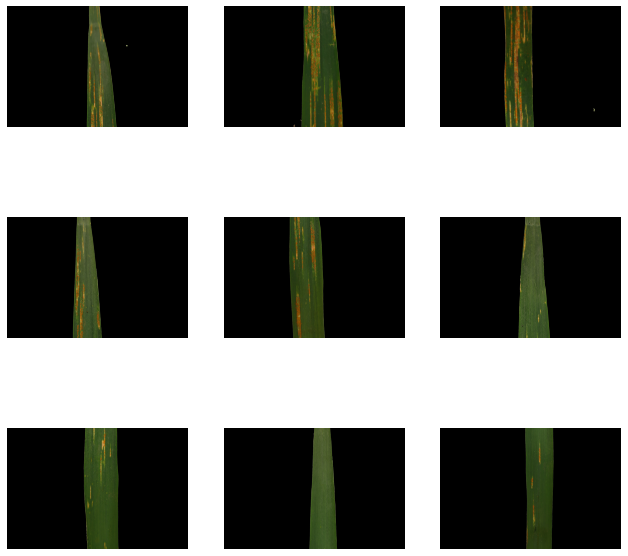

In [8]:
fig=plt.figure(figsize=(11,11))
rows,cols=3,3
for j in range(0,cols*rows):
    fig.add_subplot(rows,cols,j+1)
    plt.imshow(images[j])
    plt.axis('off')
plt.show()

In [9]:
imagePaths = []
for dirname, _, filenames in os.walk('C:\\Users\\Akshata\\Desktop\\project\\Rice Leaf Disease Images\\Train\\'):
    for filename in filenames:
        if (filename[-3:] == 'jpg'):
            imagePaths.append(os.path.join(dirname, filename))

In [10]:
Data = []
Target = []
resize = 255

cat = {'control': 'control',
       'diseased':'diseased'}

for imagePath in tqdm(imagePaths):
    label = imagePath.split(os.path.sep)[-2]
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (resize, resize)) /255

    Data.append(image)
    Target.append(cat[label])

100%|████████████████████████████████████████████████████████████████████████████████| 601/601 [00:43<00:00, 13.92it/s]


C:\Users\Akshata\.conda\envs\poject\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


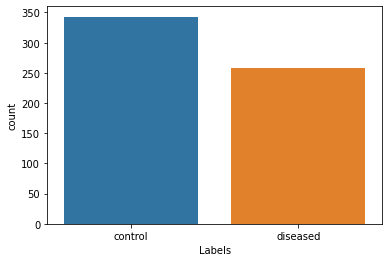

In [11]:
df=pd.DataFrame(Target,columns=['Labels'])
sns.countplot(df['Labels'])
plt.show()

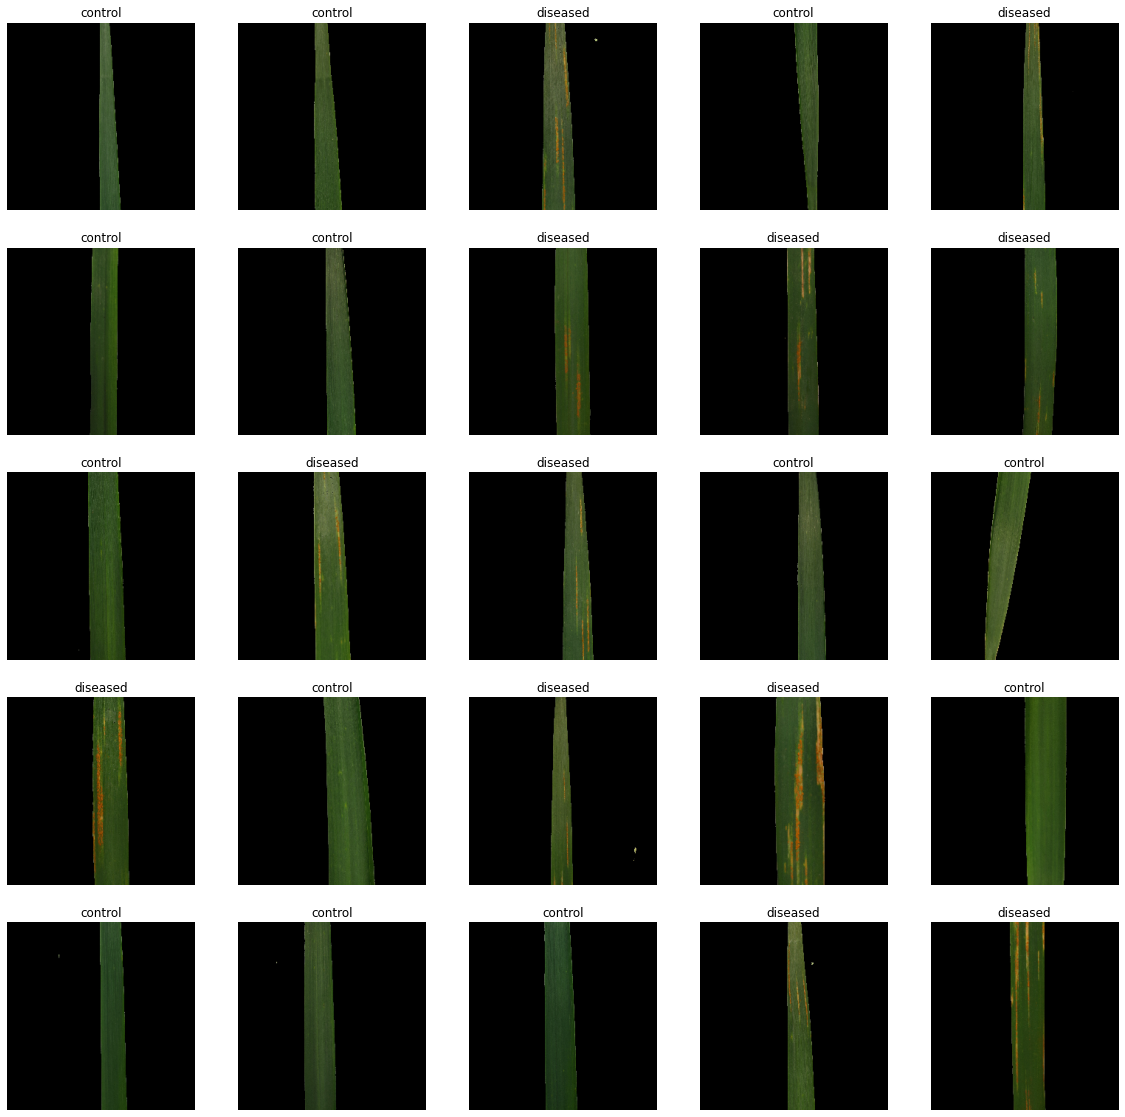

In [12]:
plt.figure(figsize=(20,20))
for n, i in enumerate(list(np.random.randint(0,len(imagePaths),25))):
    plt.subplot(5,5,n+1)
    plt.imshow(Data[i], cmap='gray')
    plt.title(Target[i])
    plt.axis('off')
plt.show()

In [13]:
le = LabelEncoder()
labels = le.fit_transform(Target)
labels = to_categorical(labels)

print(le.classes_)
print(labels)

['control' 'diseased']
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [14]:
(x_train, x_test, y_train, y_test) = train_test_split(Data,labels,test_size=0.20,stratify=labels,random_state=42)

In [15]:
trainX = np.array(x_train)
testX = np.array(x_test)
trainY = np.array(y_train)
testY = np.array(y_test)

print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)


(480, 255, 255, 3)
(121, 255, 255, 3)
(480, 2)
(121, 2)


In [16]:
s=255

In [17]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size =(3,3), activation = "relu", input_shape=(s,s,3), kernel_initializer='he_normal',))
# model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size =(3,3), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 128, kernel_size =(3,3), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2), strides = (1,1)))

model.add(Dropout(0.25))

#fully connected
model.add(Flatten())
model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(2, activation = "softmax"))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [18]:
model.compile(optimizer = keras.optimizers.Adam(),
              loss= keras.losses.categorical_crossentropy,
              metrics= ['accuracy'])

In [19]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 253, 253, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 124, 124, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 59, 59, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 59, 59, 128)      

In [20]:
epochs = 15

history = model.fit(trainX, trainY, epochs=epochs, batch_size=40, verbose=1)


Epoch 1/15
480/480 [==============================] - 34s 70ms/step - loss: 1.0628 - accuracy: 0.5938
Epoch 2/15
480/480 [==============================] - 33s 69ms/step - loss: 0.2959 - accuracy: 0.8833
Epoch 3/15
480/480 [==============================] - 33s 70ms/step - loss: 0.1842 - accuracy: 0.9208
Epoch 4/15
480/480 [==============================] - 34s 72ms/step - loss: 0.0964 - accuracy: 0.9667
Epoch 5/15
480/480 [==============================] - 33s 70ms/step - loss: 0.1050 - accuracy: 0.9583
Epoch 6/15
480/480 [==============================] - 33s 69ms/step - loss: 0.0615 - accuracy: 0.9792
Epoch 7/15
480/480 [==============================] - 33s 69ms/step - loss: 0.0219 - accuracy: 0.9958
Epoch 8/15
480/480 [==============================] - 34s 71ms/step - loss: 0.0071 - accuracy: 1.0000
Epoch 9/15
480/480 [==============================] - 34s 70ms/step - loss: 0.0067 - accuracy: 1.0000
Epoch 10/15
480/480 [==============================] - 34s 71ms/step - loss: 0.00

In [21]:
modelLoss, modelAccuracy = model.evaluate(testX, testY, verbose=0)

print('Test Loss is {}'.format(modelLoss))
print('Test Accuracy is {}'.format(modelAccuracy))

Test Loss is 0.12735275027134324
Test Accuracy is 0.9834710955619812


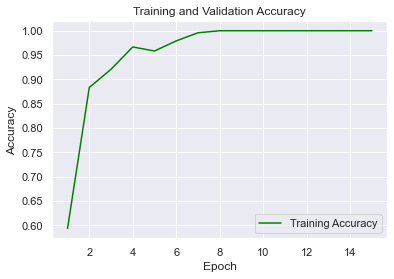

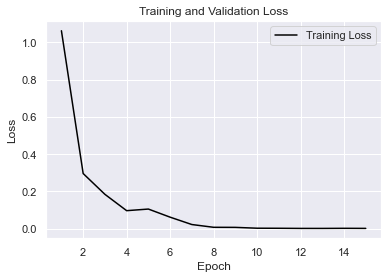

In [22]:
sns.set()
acc=history.history['accuracy']
loss=history.history['loss']
epochs=range(1, len(loss) + 1)

plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.figure()

plt.plot(epochs, loss, color='black', label='Training Loss')
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [23]:
model.save("Disease_Images_model.h5")

In [24]:
class_names = ['control', 'diseased']

y_pred = model.predict(testX)
print(class_names[np.argmax(y_pred[1])])

control


In [25]:
# classification report on train
batch_size=40

predIdxs = model.predict (trainX, batch_size=batch_size)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(trainY.argmax(axis=1), predIdxs, target_names=le.classes_, digits = 5))

              precision    recall  f1-score   support

     control    1.00000   1.00000   1.00000       274
    diseased    1.00000   1.00000   1.00000       206

    accuracy                        1.00000       480
   macro avg    1.00000   1.00000   1.00000       480
weighted avg    1.00000   1.00000   1.00000       480



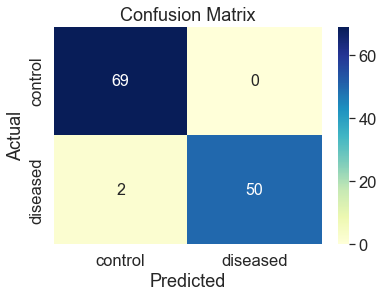

In [26]:
# Plotting Confusion Matrix
x = confusion_matrix(testY.argmax(axis=1),y_pred.argmax(axis=1))
Confusion_Matrix = pd.DataFrame(x, index=class_names, columns=class_names)

sns.set(font_scale=1.5, color_codes=True, palette='deep')
sns.heatmap(Confusion_Matrix, annot=True, annot_kws={'size':16}, fmt='d', cmap='YlGnBu')

plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title('Confusion Matrix')
plt.show()